In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21] # 정상이라면 [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

In [17]:
 # dice를 대상으로 prob 확률을 따라 100개의 데이터 무작위로 뽑기
np.random.seed(42) # 같은 난수 발생의 재현을 위한 설정
samples = np.random.choice(dice, size=100, p=prob)
samples2 = np.random.choice(dice, size=10000, p=prob)

In [18]:
freq, _ = np.histogram(samples, bins=6, range=(1, 7))
freq2, _ = np.histogram(samples2, bins=6, range=(1, 7))

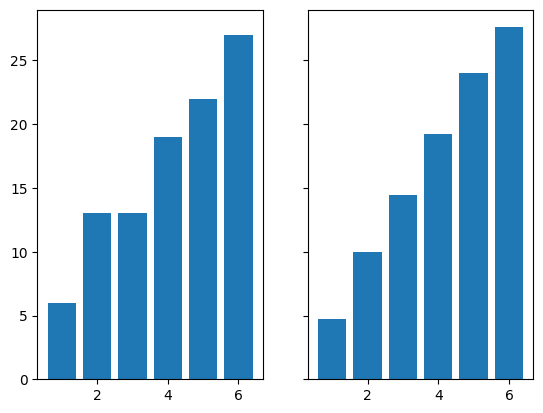

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)

axes[0].bar(range(1, 7), freq)
axes[1].bar(range(1, 7), freq2/100)
plt.show()